# Project 3 : Energy Efficiency

Project Group Number: 23

Group Members: Jimit Mehta

## Context

 This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

## Data Description

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('ENB2012_data.csv')

In [6]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Data Preprocessing

Data Cleaning : Finding number of missing values for input features and imputing missing values.

In [6]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [8]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
data = data.rename(columns={'X1':'Relative Compactness', 'X2':'Surface Area','X3':'Wall Area','X4':'Roof Area','X5' : 'Overall Height','X6':'Orientation','X7':'Glazing Area','X8':'Glazing Area Distribution','Y1' : 'Heating Load','Y2':'Cooling Load' })
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Correlation Matrix

Plotting Correlation Matrix showing correlation coeeficients between sets of varibles and target variable.

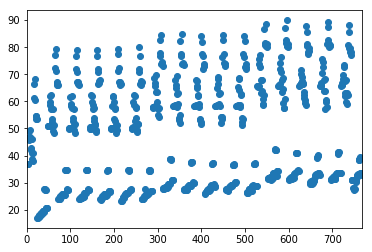

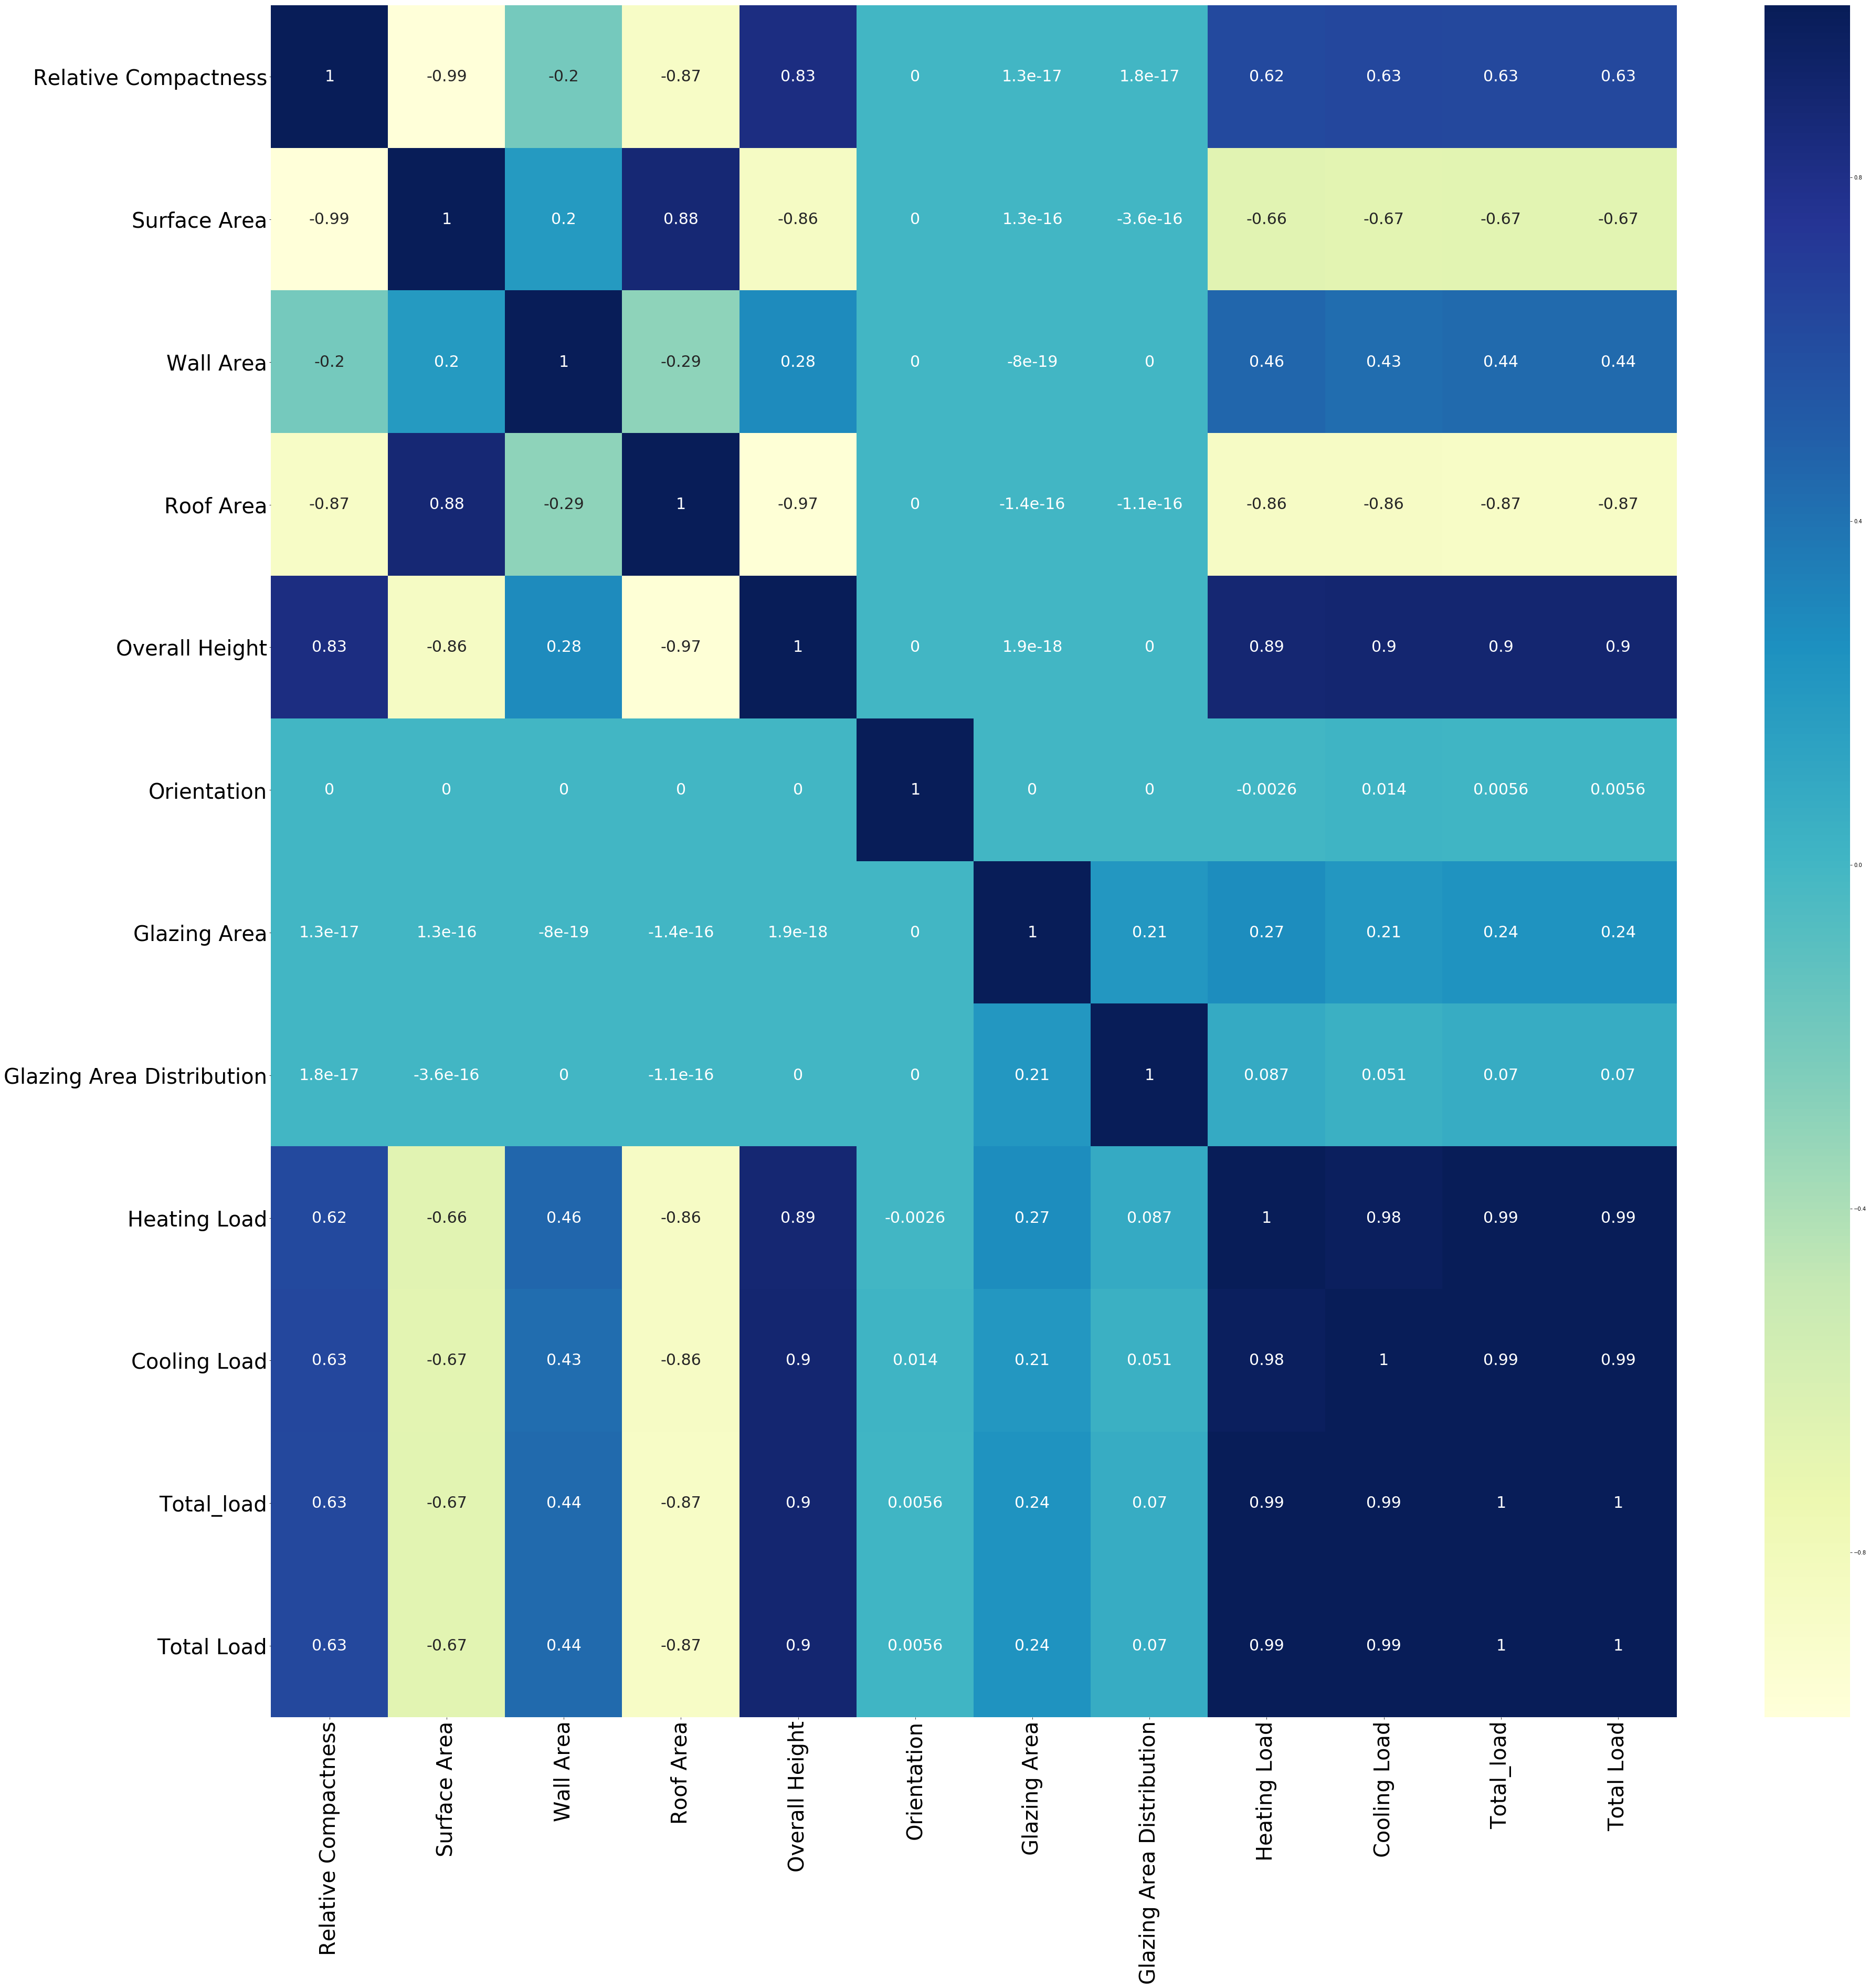

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = data.corr()
fig, ax = plt.subplots(figsize=(60, 60))
ax.tick_params(labelsize=40)
sns.heatmap(correlation, annot=True,annot_kws={"size": 30},cmap='YlGnBu')
plt.show()

In [29]:
data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

Generating Input feature and Target Variable as X and Y variable.

In [8]:
X = data[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area','Glazing Area Distribution']]
y = data[['Heating Load', 'Cooling Load']]

In [48]:
X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [49]:
y.head()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


## Variable Importance Plot

Variable importance plot provides a list of the most significant variables in descending order by a mean decrease. The top variables contribute more to the model than the bottom ones and also have high predictive power in predicting Heating and Cooling Load.

In [50]:
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

Sr = pd.Series(model.feature_importances_,index = X.columns)
#Sr.sort_values(inplace = True)
print(Sr)

[0.037 0.037 0.043 0.322 0.478 0.006 0.069 0.009]
Relative Compactness         0.036608
Surface Area                 0.036671
Wall Area                    0.042856
Roof Area                    0.322170
Overall Height               0.477855
Orientation                  0.006024
Glazing Area                 0.068960
Glazing Area Distribution    0.008856
dtype: float64


In [51]:
Sr.sort_values(inplace = True)
print(Sr)

Orientation                  0.006024
Glazing Area Distribution    0.008856
Relative Compactness         0.036608
Surface Area                 0.036671
Wall Area                    0.042856
Glazing Area                 0.068960
Roof Area                    0.322170
Overall Height               0.477855
dtype: float64


# Pre Analysis

Overall Height V/s Heating Load

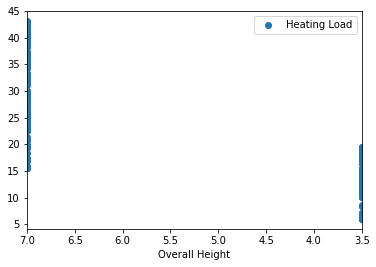

In [52]:
data.plot(x='Overall Height', y='Heating Load', style='o')
plt.show()

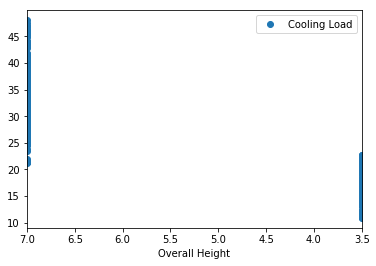

In [53]:
data.plot(x='Overall Height', y='Cooling Load', style='o')
plt.show()

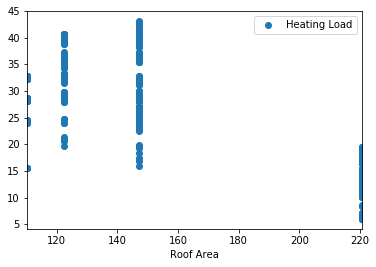

In [54]:
data.plot(x='Roof Area', y='Heating Load', style='o')
plt.show()

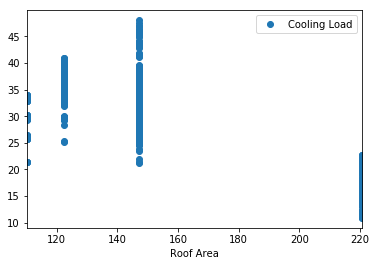

In [55]:
data.plot(x='Roof Area', y='Cooling Load', style='o')
plt.show()

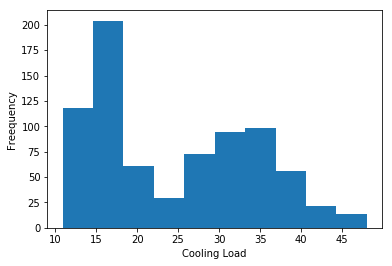

In [83]:
import matplotlib.pyplot as plt
plt.hist(y['Cooling Load'])
plt.xlabel('Cooling Load')
plt.ylabel('Freequency')
plt.show()

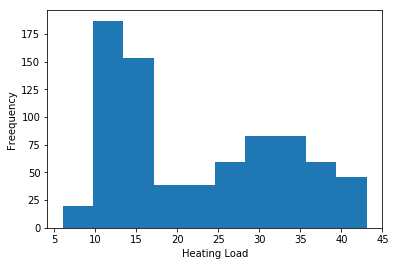

In [82]:
import matplotlib.pyplot as plt
plt.hist(y['Heating Load'])
plt.xlabel('Heating Load')
plt.ylabel('Freequency')
plt.show()

## Feature Extraction - Transformation

MinMax Scaling[0-1] was applied to Input variables because for certain variables range of values were marginally high compared to other variable values. By doing this we ensure that all the variables contribute equally to the analysis and optimize the prediction ratings.

In [95]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
numpy.set_printoptions(precision=3)
X_scaled.columns = X.columns

In [96]:
X_scaled.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
0,1.000000,0.000000,0.285714,0.000000,1.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.0


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 10)

## Predictive Models

In [104]:
result_new = pd.DataFrame(index=None, columns=['model','train_R2', 'test_R2', 'train_MSE','test_MSE'])

## Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

linreg = LinearRegression().fit(X_train, y_train)
print(linreg.score(X_train, y_train))

print(linreg.score(X_test, y_test))

0.9014576876823758
0.9245847998153572


In [105]:
train_R2 = linreg.score(X_train, y_train)
test_R2 = linreg.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, linreg.predict(X_train))
test_MSE = mean_squared_error(y_test, linreg.predict(X_test))
result_new = result_new.append(pd.Series({'model':'Linear Regression','train_R2':train_R2, 'test_R2':test_R2, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
result_new

,model,train_R2,test_R2,train_MSE,test_MSE
0,Linear Regression,0.901458,0.924585,18.932813,13.774659


In [184]:
linregg = pd.DataFrame(linreg.predict(X_test), columns = ['Heating Load','Cooling Load'])
linregg.head(10)

,Heating Load,Cooling Load
0,18.031250,19.671875
1,18.968750,20.296875
2,10.328125,14.031250
3,27.703125,30.093750
4,18.031250,19.671875
5,5.218750,10.343750
6,10.890625,14.687500
7,29.937500,32.656250
8,31.687500,32.156250
9,14.953125,17.468750


## Bagging

In [205]:
from sklearn.ensemble import BaggingRegressor
lreg = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error

bagging_rgr_c = BaggingRegressor(lreg , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Heating Load'])

train_MSE = mean_squared_error(y_train['Heating Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.91
Test score: 0.93
Train MSE: 9.13
Test MSE: 7.11


In [204]:
from sklearn.ensemble import BaggingRegressor
lreg = LinearRegression()

bagging_rgr_c = BaggingRegressor(lreg , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Cooling Load'])

train_MSE = mean_squared_error(y_train['Cooling Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.88
Test score: 0.91
Train MSE: 10.95
Test MSE: 7.85


## Boosting

In [199]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = lreg, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Heating Load'])
train_MSE = mean_squared_error(y_train['Heating Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.91
Test score: 0.92
Train MSE: 9.19
Test MSE: 7.39


In [201]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = lreg, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Cooling Load'])
train_MSE = mean_squared_error(y_train['Cooling Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.88
Test score: 0.90
Train MSE: 11.14
Test MSE: 8.26


## Checking the Important Variables for the model

Scikit-learn is a good way to plot a linear regression but if we are considering linear regression for modelling purposes then we need to know the importance of variables( significance) with respect to the hypothesis.

To do this, we need to calculate the p value for each variable and if it is less than the desired cutoff( 0.05 is the general cut off for 95% significance) then we can say with confidence that a variable is significant.

In [120]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model1=sm.OLS(y_train['Heating Load'],X_train)
result = model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     839.5
Date:                Mon, 30 Apr 2018   Prob (F-statistic):          8.71e-295
Time:                        01:15:37   Log-Likelihood:                -1451.6
No. Observations:                 576   AIC:                             2919.
Df Residuals:                     568   BIC:                             2954.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Relative Compactness  

In [122]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model1=sm.OLS(y_train['Cooling Load'],X_train)
result = model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling Load   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     596.1
Date:                Mon, 30 Apr 2018   Prob (F-statistic):          6.07e-257
Time:                        01:16:49   Log-Likelihood:                -1506.0
No. Observations:                 576   AIC:                             3028.
Df Residuals:                     568   BIC:                             3063.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Relative Compactness  

Since columns Glazing Area Distribution and Orientation have p-value greater than 0.05, these variables are insignificant.

In [9]:
X = X.drop(['Glazing Area Distribution','Orientation'], axis = 1)

In [73]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
numpy.set_printoptions(precision=3)
X_scaled.columns = X.columns

In [74]:
X_scaled.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
0,1.000000,0.000000,0.285714,0.000000,1.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.0


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 10)

## Decision Tree

In [223]:
dt_rgr = DecisionTreeRegressor()
param_grid = {'max_depth': [3,4,5]}

grid_search = GridSearchCV(dt_rgr, param_grid, cv = 10, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [224]:
grid_search.best_params_

{'max_depth': 5}

In [102]:
dt_rgr = DecisionTreeRegressor(max_depth = 5)
dt_rgr.fit(X_train,y_train)
y_dt_clf = dt_rgr.predict(X_test)
print('Train score: {0:0.2f}'.format(dt_rgr.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(dt_rgr.score(X_test, y_test)))

Train score: 0.98
Test score: 0.98


In [106]:
train_R2 = dt_rgr.score(X_train, y_train)
test_R2 = dt_rgr.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, dt_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test, dt_rgr.predict(X_test))
result_new = result_new.append(pd.Series({'model':'Decision Tree','train_R2':train_R2, 'test_R2':test_R2, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
result_new

,model,train_R2,test_R2,train_MSE,test_MSE
0,Linear Regression,0.901458,0.924585,18.932813,13.774659
1,Decision Tree,0.983850,0.981426,3.102836,3.392602


In [226]:
dt = pd.DataFrame(dt_rgr.predict(X_test),columns =['Heating Load','Cooling Load'])
dt

,Heating Load,Cooling Load
0,18.768571,21.600714
1,16.655333,16.799333
2,12.427234,15.190851
3,26.505227,28.959318
4,18.768571,21.600714
5,6.211667,11.218333
6,11.327037,14.315185
7,36.465294,38.350000
8,30.579016,31.862459
9,16.991250,20.443125


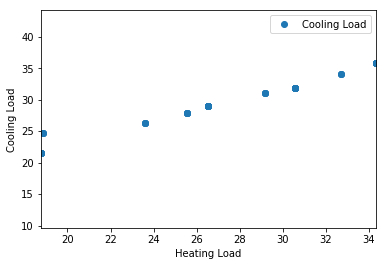

In [227]:
dt.plot(x='Heating Load', y='Cooling Load', style='o')
plt.ylabel('Cooling Load')
plt.show()

# Bagging

In [228]:
from sklearn.ensemble import BaggingRegressor
dc_rgr = DecisionTreeRegressor(max_depth=5)
from sklearn.metrics import r2_score, mean_squared_error

bagging_rgr_c = BaggingRegressor(dc_rgr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Heating Load'])

train_MSE = mean_squared_error(y_train['Heating Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.99
Test score: 0.99
Train MSE: 0.80
Test MSE: 1.29


In [229]:
from sklearn.ensemble import BaggingRegressor
dc_rgr = DecisionTreeRegressor(max_depth=5)
from sklearn.metrics import r2_score, mean_squared_error

bagging_rgr_c = BaggingRegressor(dc_rgr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Cooling Load'])

train_MSE = mean_squared_error(y_train['Cooling Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.97
Test score: 0.97
Train MSE: 2.94
Test MSE: 2.75


# Boosting

In [230]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = dc_rgr, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Heating Load'])
train_MSE = mean_squared_error(y_train['Heating Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.99
Test score: 0.99
Train MSE: 0.57
Test MSE: 0.76


In [231]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = dc_rgr, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Cooling Load'])
train_MSE = mean_squared_error(y_train['Cooling Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.97
Test score: 0.97
Train MSE: 2.96
Test MSE: 2.79


# KNN Neighbors

In [109]:
from sklearn.neighbors import KNeighborsRegressor

knn_rgr = KNeighborsRegressor()

param_grid = {'n_neighbors':[5, 10, 20, 50]}

grid_search = GridSearchCV(knn_rgr , param_grid, cv = 10 , return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [110]:
grid_search.best_params_

{'n_neighbors': 10}

In [111]:
knn_rgr = KNeighborsRegressor(n_neighbors=10)
knn_rgr.fit(X_train,y_train)
y_knn_rgr = knn_rgr.predict(X_test)
print('Train score: {0:0.2f}'.format(knn_rgr.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(knn_rgr.score(X_test, y_test)))

Train score: 0.98
Test score: 0.98


In [112]:
train_R2 = knn_rgr.score(X_train, y_train)
test_R2 = knn_rgr.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, knn_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test, knn_rgr.predict(X_test))
result_new = result_new.append(pd.Series({'model':'KNN','train_R2':train_R2, 'test_R2':test_R2, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
result_new

,model,train_R2,test_R2,train_MSE,test_MSE
0,Linear Regression,0.901458,0.924585,18.932813,13.774659
1,Decision Tree,0.983850,0.981426,3.102836,3.392602
2,KNN,0.984873,0.983680,2.906243,2.980906


# Bagging

In [233]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error

bagging_rgr_c = BaggingRegressor(knn_rgr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Heating Load'])

train_MSE = mean_squared_error(y_train['Heating Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.99
Test score: 0.99
Train MSE: 1.00
Test MSE: 1.31


In [234]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error

bagging_rgr_c = BaggingRegressor(knn_rgr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Cooling Load'])

train_MSE = mean_squared_error(y_train['Cooling Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.97
Test score: 0.97
Train MSE: 3.04
Test MSE: 2.72


# Boosting

In [235]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = knn_rgr, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Heating Load'])
train_MSE = mean_squared_error(y_train['Heating Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 1.00
Test score: 1.00
Train MSE: 0.25
Test MSE: 0.41


In [236]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = knn_rgr, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Cooling Load'])
train_MSE = mean_squared_error(y_train['Cooling Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.97
Test score: 0.97
Train MSE: 2.90
Test MSE: 2.62


# Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

#Tuning ridge on new dataset
param_grid = {"max_depth": [3, 5],
              "max_features": sp_randint(1, 6),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False]}
random_search = RandomizedSearchCV(RandomForestRegressor(n_estimators=1000), param_distributions=param_grid,
                                   n_iter=20, random_state=0,n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [3, 5], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000212D86FCC88>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000212D86FCEF0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000212D86D8748>, 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbos

In [114]:
train_R2 = random_search.score(X_train, y_train)
test_R2 = random_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, random_search.predict(X_train))
test_MSE = mean_squared_error(y_test, random_search.predict(X_test))
result_new = result_new.append(pd.Series({'model':'Random Forest','train_R2':train_R2, 'test_R2':test_R2, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
result_new

,model,train_R2,test_R2,train_MSE,test_MSE
0,Linear Regression,0.901458,0.924585,18.932813,13.774659
1,Decision Tree,0.983850,0.981426,3.102836,3.392602
2,KNN,0.984873,0.983680,2.906243,2.980906
3,Random Forest,0.986272,0.985883,2.637603,2.578422


In [239]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [240]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
random_frst_rgr = RandomForestRegressor(max_depth=5,max_features=3,min_samples_leaf=2,min_samples_split=3,bootstrap=True)
bagging_rgr_c = BaggingRegressor(random_frst_rgr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Cooling Load'])

train_MSE = mean_squared_error(y_train['Cooling Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.97
Test score: 0.97
Train MSE: 2.99
Test MSE: 2.70


In [241]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
random_frst_rgr = RandomForestRegressor(max_depth=5,max_features=3,min_samples_leaf=2,min_samples_split=3,bootstrap=True)
bagging_rgr_c = BaggingRegressor(random_frst_rgr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Heating Load'])

train_MSE = mean_squared_error(y_train['Heating Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.99
Test score: 0.99
Train MSE: 0.94
Test MSE: 1.05


In [238]:
print(random_search.score(X_train, y_train))

print(random_search.score(X_test, y_test))

0.9804796467216836
0.9801642249444629


# SVR

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=5)

grid_search.fit(X_train, y_train['Heating Load'])

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.91


In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

MLP_rgr = MultiOutputRegressor(estimator=SVR(kernel = 'linear', C = 100, gamma = 0.001))

#grid_search = GridSearchCV(MLP_rgr, param_grid, cv=5)

MLP_rgr.fit(X_train, y_train)

#print("Best parameters: {}".format(grid_search.best_params_))
#print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

MultiOutputRegressor(estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=1)

In [116]:
print(MLP_rgr.score(X_train, y_train))

print(MLP_rgr.score(X_test, y_test))

0.8947617538724234
0.9217055028035773


In [117]:
train_R2 = MLP_rgr.score(X_train, y_train)
test_R2 = MLP_rgr.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, MLP_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test, MLP_rgr.predict(X_test))
result_new = result_new.append(pd.Series({'model':'SVR Linear','train_R2':train_R2, 'test_R2':test_R2, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
result_new

,model,train_R2,test_R2,train_MSE,test_MSE
0,Linear Regression,0.901458,0.924585,18.932813,13.774659
1,Decision Tree,0.983850,0.981426,3.102836,3.392602
2,KNN,0.984873,0.983680,2.906243,2.980906
3,Random Forest,0.986272,0.985883,2.637603,2.578422
4,SVR Linear,0.894762,0.921706,19.518836,13.711037


# Bagging

In [245]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
svr = SVR(kernel = 'linear', C = 100, gamma = 0.001)
bagging_rgr_c = BaggingRegressor(svr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Heating Load'])

train_MSE = mean_squared_error(y_train['Heating Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.91
Test score: 0.93
Train MSE: 9.47
Test MSE: 7.10


In [246]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
svr = SVR(kernel = 'linear', C = 100, gamma = 0.001)
bagging_rgr_c = BaggingRegressor(svr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Cooling Load'])

train_MSE = mean_squared_error(y_train['Cooling Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.87
Test score: 0.91
Train MSE: 11.48
Test MSE: 7.83


# Boosting

In [247]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Cooling Load'])
train_MSE = mean_squared_error(y_train['Cooling Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.87
Test score: 0.90
Train MSE: 11.41
Test MSE: 8.61


In [248]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Heating Load'])
train_MSE = mean_squared_error(y_train['Heating Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.91
Test score: 0.93
Train MSE: 9.22
Test MSE: 7.16


# SVR - RBF

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv=5)

grid_search.fit(X_train, y_train['Heating Load'])

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'gamma': 10}
Best cross-validation score: 1.00


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

MLP_svr = MultiOutputRegressor(estimator=SVR(kernel = 'rbf', C = 1000, gamma = 10))

#grid_search = GridSearchCV(MLP_rgr, param_grid, cv=5)

MLP_svr.fit(X_train, y_train)

#print("Best parameters: {}".format(grid_search.best_params_))
#print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print(MLP_svr.score(X_train, y_train))

print(MLP_svr.score(X_test, y_test))

0.9845176075653511
0.9828659936597356


In [119]:
train_R2 = MLP_svr.score(X_train, y_train)
test_R2 = MLP_svr.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, MLP_svr.predict(X_train))
test_MSE = mean_squared_error(y_test, MLP_svr.predict(X_test))
result_new = result_new.append(pd.Series({'model':'SVR RBF','train_R2':train_R2, 'test_R2':test_R2, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
result_new

,model,train_R2,test_R2,train_MSE,test_MSE
0,Linear Regression,0.901458,0.924585,18.932813,13.774659
1,Decision Tree,0.983850,0.981426,3.102836,3.392602
2,KNN,0.984873,0.983680,2.906243,2.980906
3,Random Forest,0.986272,0.985883,2.637603,2.578422
4,SVR Linear,0.894762,0.921706,19.518836,13.711037
5,SVR RBF,0.984518,0.982866,2.092864,2.204790


# Bagging

In [250]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
svr = SVR(kernel = 'rbf', C = 1000, gamma = 10)
bagging_rgr_c = BaggingRegressor(svr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Heating Load'])

train_MSE = mean_squared_error(y_train['Heating Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))


Train score: 1.00
Test score: 1.00
Train MSE: 0.18
Test MSE: 0.34


In [251]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
svr = SVR(kernel = 'rbf', C = 1000, gamma = 10)
bagging_rgr_c = BaggingRegressor(svr , n_estimators = 100, max_features = 6, bootstrap = True)
bagging_rgr_c.fit(X_train,y_train['Cooling Load'])

train_MSE = mean_squared_error(y_train['Cooling Load'], bagging_rgr_c.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], bagging_rgr_c.predict(X_test))
print('Train score: {0:0.2f}'.format(bagging_rgr_c.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(bagging_rgr_c.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.97
Test score: 0.97
Train MSE: 2.68
Test MSE: 2.54


# Boosting

In [252]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Heating Load'])
train_MSE = mean_squared_error(y_train['Heating Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Heating Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Heating Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Heating Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 1.00
Test score: 1.00
Train MSE: 0.20
Test MSE: 0.32


In [253]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

adaboost_rgr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5)
adaboost_rgr.fit(X_train,y_train['Cooling Load'])
train_MSE = mean_squared_error(y_train['Cooling Load'], adaboost_rgr.predict(X_train))
test_MSE = mean_squared_error(y_test['Cooling Load'], adaboost_rgr.predict(X_test))
print('Train score: {0:0.2f}'.format(adaboost_rgr.score(X_train, y_train['Cooling Load'])))
print('Test score: {0:0.2f}'.format(adaboost_rgr.score(X_test, y_test['Cooling Load'])))
print('Train MSE: {0:0.2f}'.format(train_MSE))
print('Test MSE: {0:0.2f}'.format(test_MSE))

Train score: 0.96
Test score: 0.96
Train MSE: 3.33
Test MSE: 3.19


## Evalution


After evaluating all the classifiers, Random Forest regressor Produces the best result. As R2 value for the model  is 0.98. It means 98% variance can be expalined by the model. Also, Root-Mean Square Error for Random Forest is the least comapred to all other models.

In [120]:
result_new

,model,train_R2,test_R2,train_MSE,test_MSE
0,Linear Regression,0.901458,0.924585,18.932813,13.774659
1,Decision Tree,0.983850,0.981426,3.102836,3.392602
2,KNN,0.984873,0.983680,2.906243,2.980906
3,Random Forest,0.986272,0.985883,2.637603,2.578422
4,SVR Linear,0.894762,0.921706,19.518836,13.711037
5,SVR RBF,0.984518,0.982866,2.092864,2.204790


Scoring Test Data to Predict the Load.

In [124]:
test_score = pd.DataFrame(random_search.predict(X_test), columns =['Heating Load','Cooling Load','Total Load'])


In [125]:
test_score

,Heating Load,Cooling Load,Total Load
0,18.639698,21.522348,40.162046
1,16.654886,16.799010,33.453896
2,12.518283,15.271095,27.789378
3,27.591568,30.337472,57.929040
4,18.639698,21.522348,40.162046
5,7.610215,12.023644,19.633859
6,11.287884,14.385835,25.673719
7,36.491905,38.315066,74.806971
8,31.453654,32.529837,63.983491
9,16.973089,20.423507,37.396596


# Neural Network

In [77]:
y

,Heating Load,Cooling Load,total load
0,15.55,21.33,36.88
1,15.55,21.33,36.88
2,15.55,21.33,36.88
3,15.55,21.33,36.88
4,20.84,28.28,49.12
5,21.46,25.38,46.84
6,20.71,25.16,45.87
7,19.68,29.60,49.28
8,19.50,27.30,46.80
9,19.95,21.97,41.92


Converting Continous Variable into Categorical Variable for Classification.

In [78]:
y_new=y['Heating Load']+y['Cooling Load']

In [79]:
y_new.columns = ['Total Load']

In [80]:
data['Total Load']=y_new

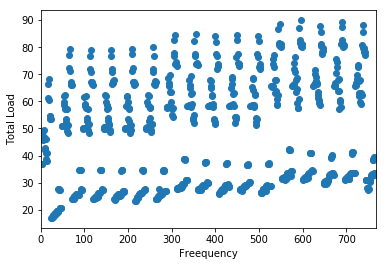

In [81]:
y_new.plot(x='numbers', y='Load', style='o')
plt.xlabel('Freequency')
plt.ylabel('Total Load')
plt.show()

From the Visualization, We can divide total load into three categories(0-40  : low, 40-65 : medium, 65 > : High)

In [82]:
import numpy as np
conditions = [
    (data['Total Load'] < 40),
    (data['Total Load'] > 40) & (data['Total Load'] < 65),
    (data['Total Load'] > 65)]
choices = ['low', 'medium', 'high']
data['Temp Range'] = np.select(conditions, choices,default=-1)
data.loc[:,['Total Load','Temp Range']]

,Total Load,Temp Range
0,36.88,low
1,36.88,low
2,36.88,low
3,36.88,low
4,49.12,medium
5,46.84,medium
6,45.87,medium
7,49.28,medium
8,46.80,medium
9,41.92,medium


In [83]:
Y = data[['Temp Range']]

In [84]:
y_final=pd.get_dummies(data=Y['Temp Range'])

In [85]:
y_final

,high,low,medium
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_final, random_state = 10)

In [126]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

### Model Definition

In [88]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(4, activation='relu')) #hidden layer
model.add(Dense(3, activation='sigmoid')) #output layer

### Model Compile

In [89]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit Model

In [90]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
576/576 [==============================] - 2s 3ms/step - loss: 0.6492 - acc: 0.5799
Epoch 2/150
576/576 [==============================] - 0s 227us/step - loss: 0.6243 - acc: 0.6591
Epoch 3/150
576/576 [==============================] - 0s 237us/step - loss: 0.6030 - acc: 0.6626
Epoch 4/150
576/576 [==============================] - 0s 422us/step - loss: 0.5810 - acc: 0.6626
Epoch 5/150
576/576 [==============================] - 0s 235us/step - loss: 0.5595 - acc: 0.6626
Epoch 6/150
576/576 [==============================] - 0s 266us/step - loss: 0.5370 - acc: 0.6626
Epoch 7/150
576/576 [==============================] - 0s 221us/step - loss: 0.5123 - acc: 0.6863
Epoch 8/150
576/576 [==============================] - 0s 278us/step - loss: 0.4850 - acc: 0.7355
Epoch 9/150
576/576 [==============================] - 0s 261us/step - loss: 0.4505 - acc: 0.7714
Epoch 10/150
576/576 [==============================] - 0s 397us/step - loss: 0.4131 - acc: 0.8166
Epoch 11/150
576/576 

576/576 [==============================] - 0s 223us/step - loss: 0.1653 - acc: 0.9525
Epoch 84/150
576/576 [==============================] - 0s 281us/step - loss: 0.1619 - acc: 0.9659
Epoch 85/150
576/576 [==============================] - 0s 233us/step - loss: 0.1609 - acc: 0.9624
Epoch 86/150
576/576 [==============================] - 0s 230us/step - loss: 0.1585 - acc: 0.9618
Epoch 87/150
576/576 [==============================] - 0s 160us/step - loss: 0.1567 - acc: 0.9659
Epoch 88/150
576/576 [==============================] - 0s 218us/step - loss: 0.1557 - acc: 0.9664
Epoch 89/150
576/576 [==============================] - 0s 210us/step - loss: 0.1542 - acc: 0.9664
Epoch 90/150
576/576 [==============================] - 0s 254us/step - loss: 0.1524 - acc: 0.9664
Epoch 91/150
576/576 [==============================] - 0s 235us/step - loss: 0.1509 - acc: 0.9664
Epoch 92/150
576/576 [==============================] - 0s 230us/step - loss: 0.1510 - acc: 0.9641
Epoch 93/150
576/576 [=

In [91]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 1s 4ms/step

acc: 96.88%


Neural Network, with one hidden layer, epochs and batch size of 150 and 10 produces 96.88 % Accuracy. 